In [1]:
from dataLoader import yfDataLoader

In [2]:
loader = yfDataLoader("AAPL")

calls, puts = loader.get_option_chain()

print(calls)

          contractSymbol  strike  impliedVolatility  volume  maturity  \
0    AAPL250613C00150000   150.0           1.568362    23.0  0.010959   
1    AAPL250613C00155000   155.0           1.285160     1.0  0.010959   
2    AAPL250613C00160000   160.0           1.472659     1.0  0.010959   
3    AAPL250613C00165000   165.0           0.999023     1.0  0.010959   
4    AAPL250613C00170000   170.0           0.886720     1.0  0.010959   
..                   ...     ...                ...     ...       ...   
477  AAPL271217C00275000   275.0           0.318015     3.0  2.523288   
478  AAPL271217C00280000   280.0           0.315864    37.0  2.523288   
479  AAPL271217C00285000   285.0           0.314124    15.0  2.523288   
480  AAPL271217C00290000   290.0           0.312385   130.0  2.523288   
481  AAPL271217C00295000   295.0           0.310645     1.0  2.523288   

     riskFreeRate  forwardMoneyness  totalVariance  
0        0.042500         -0.282029       0.026956  
1        0.042500

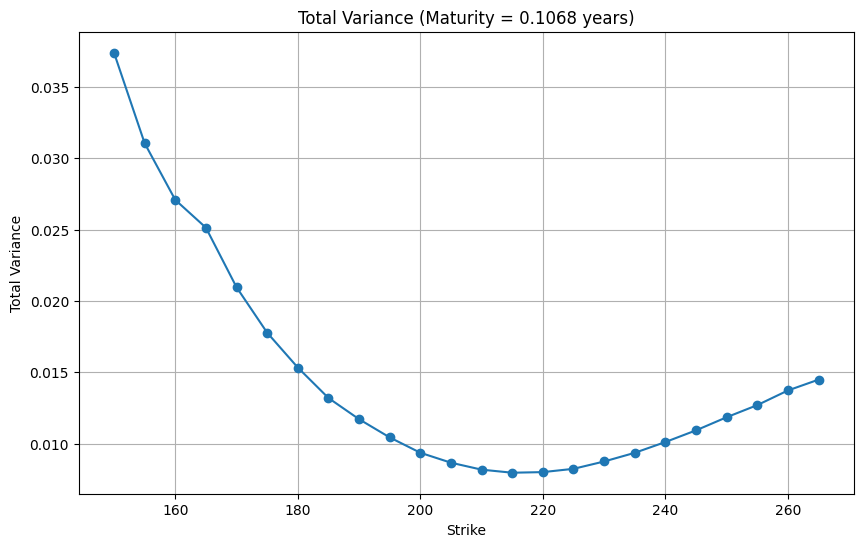

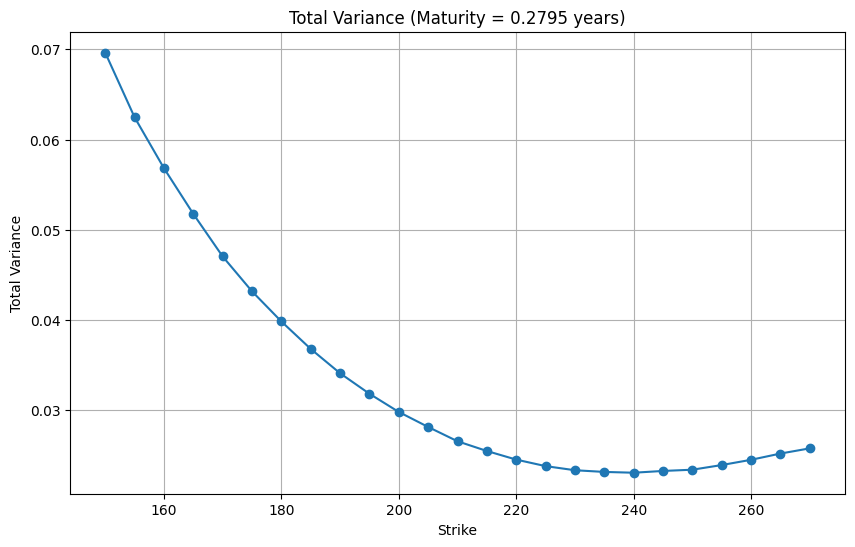

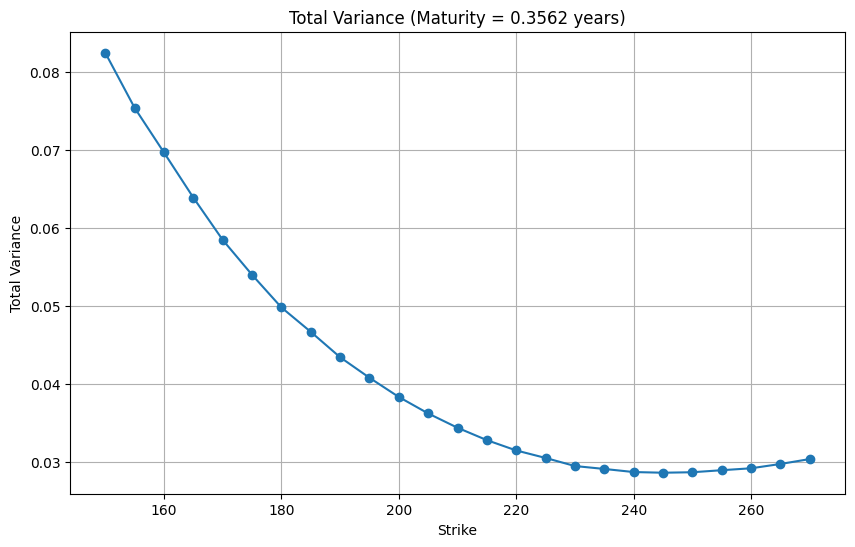

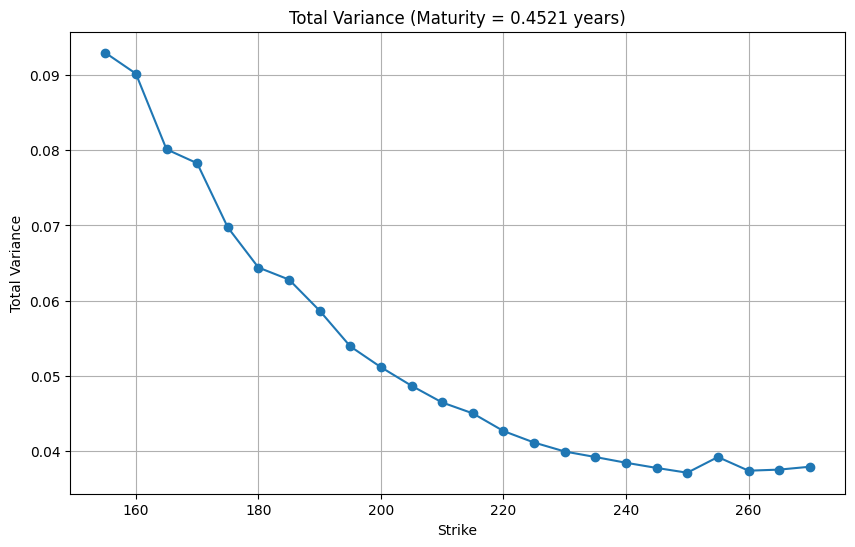

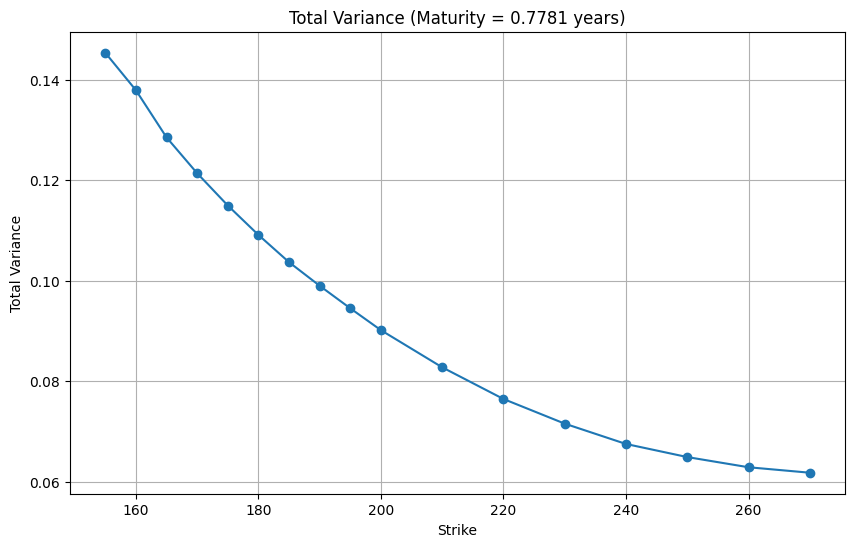

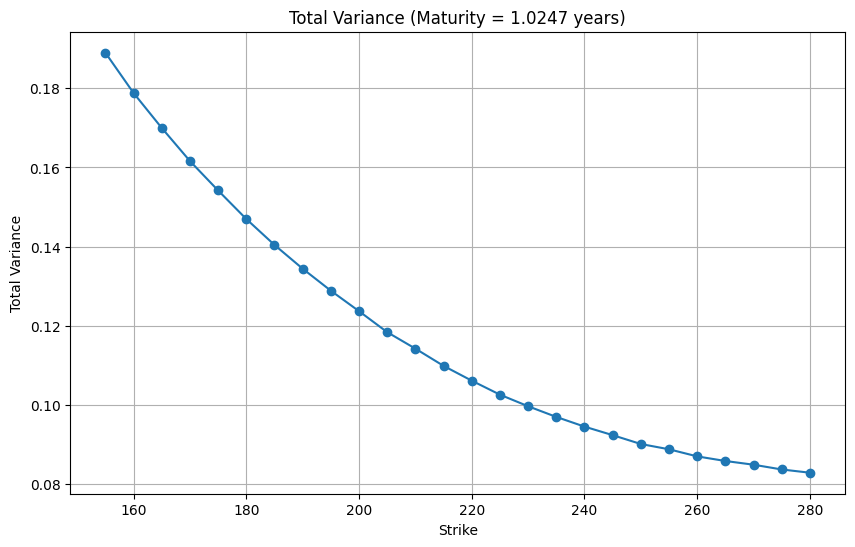

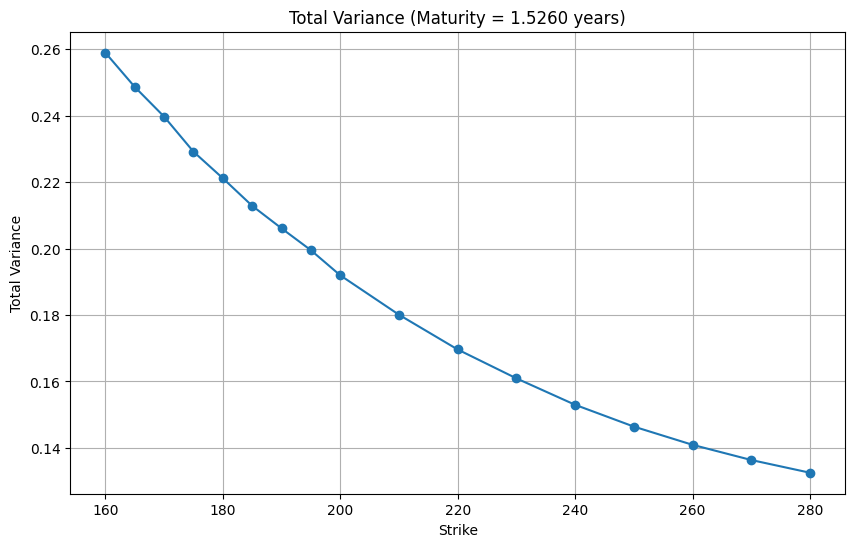

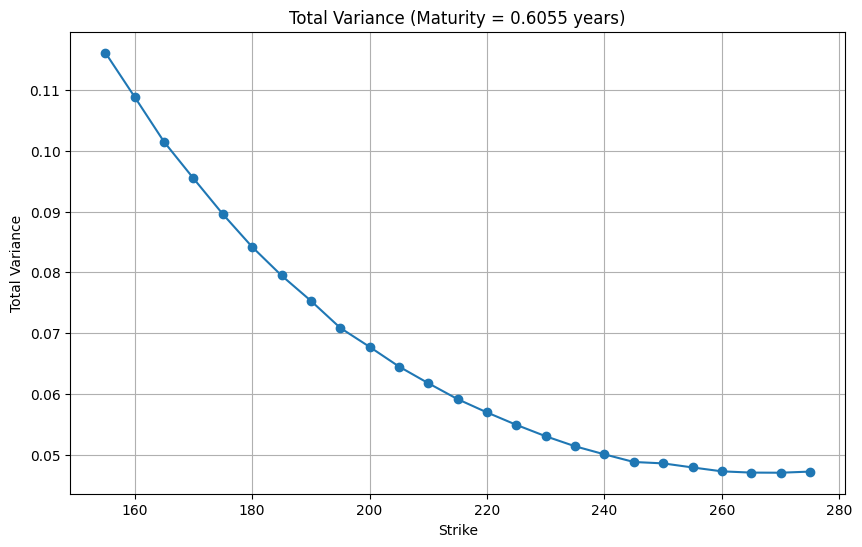

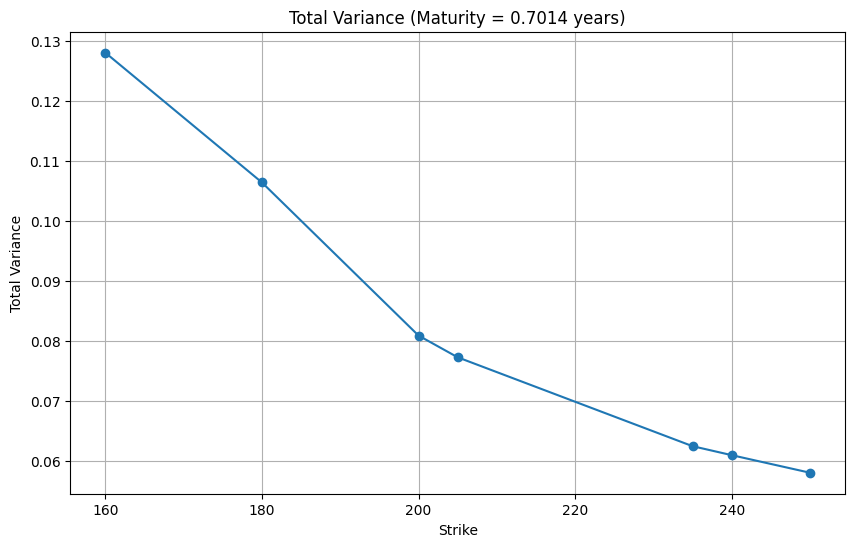

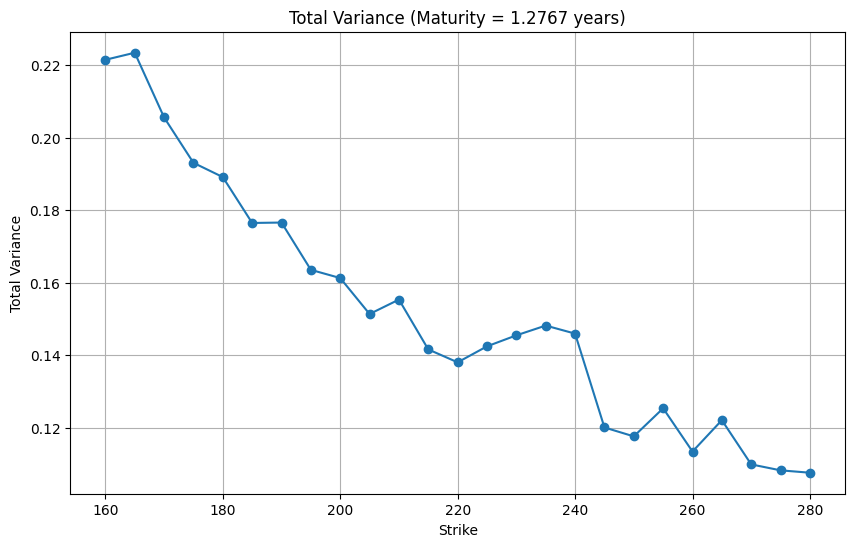

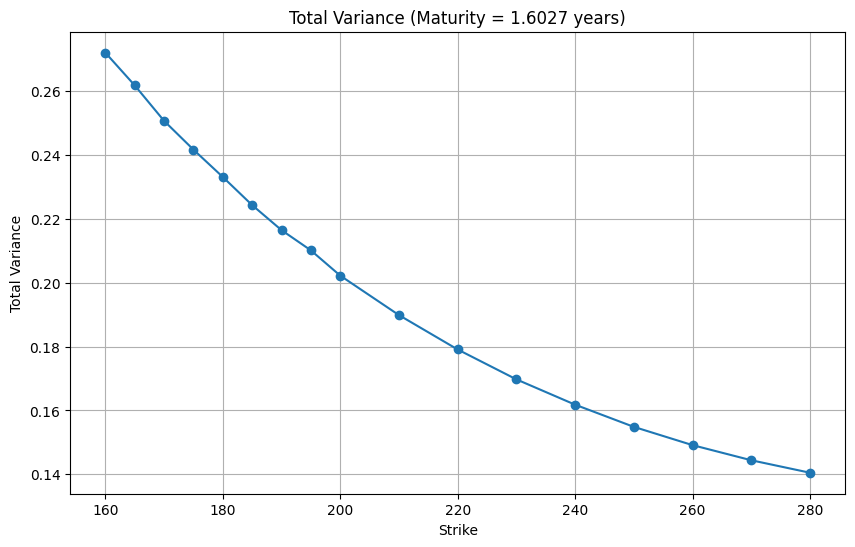

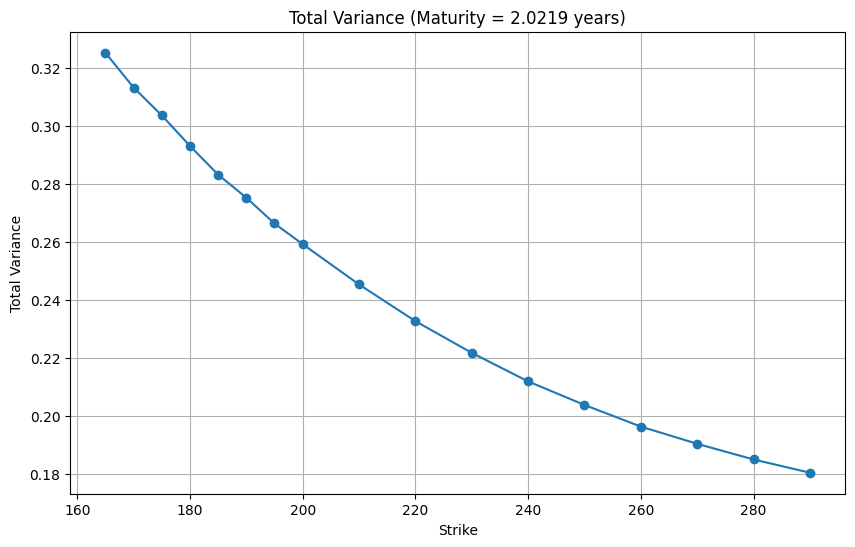

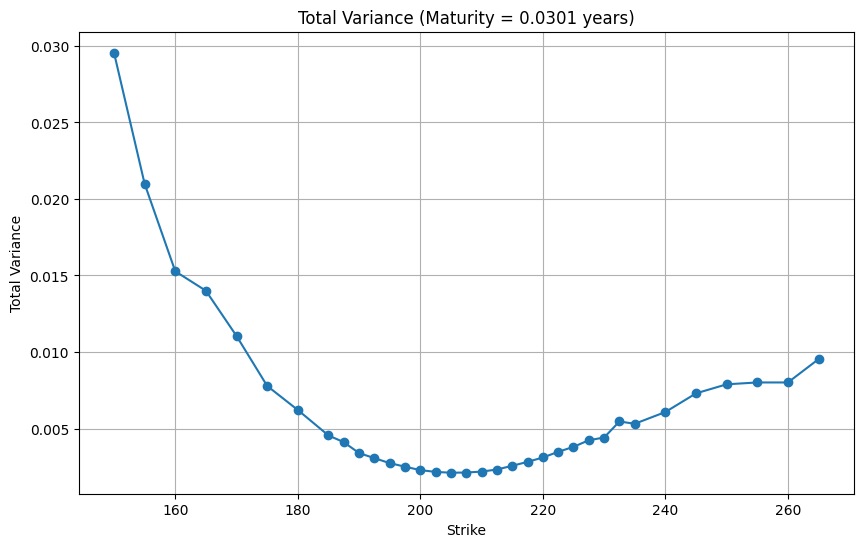

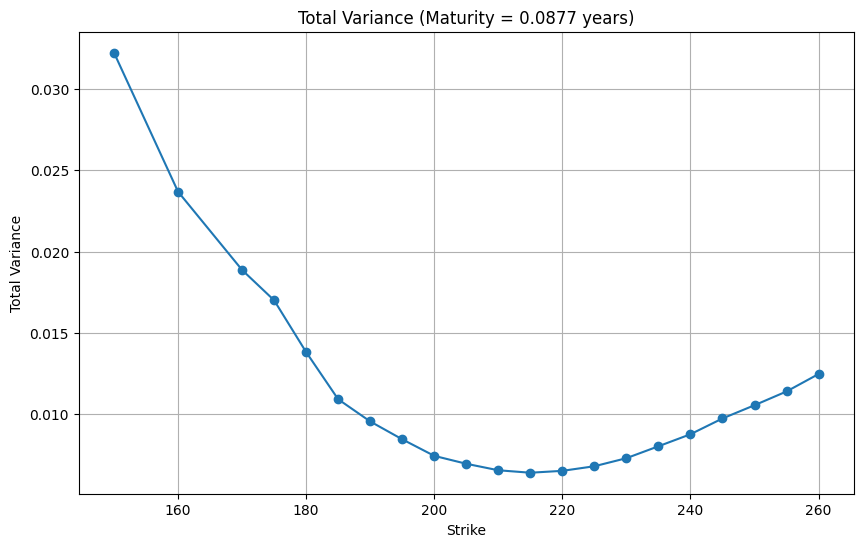

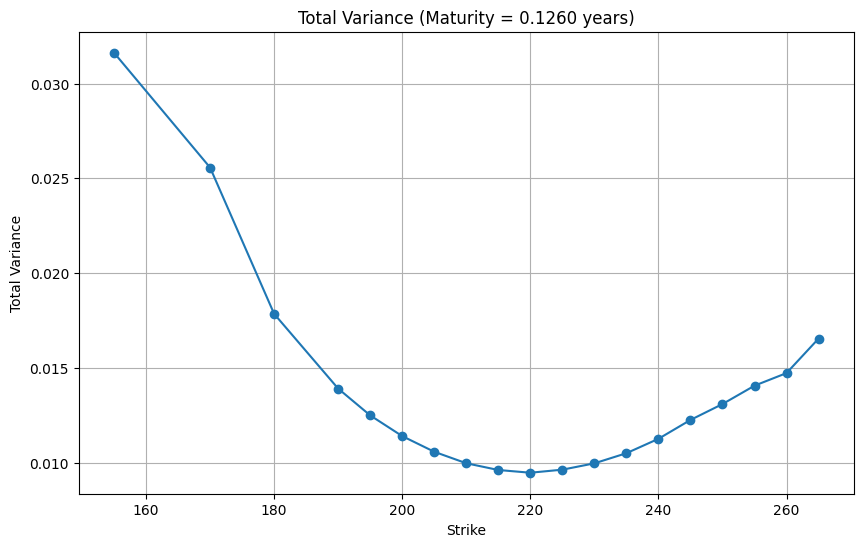

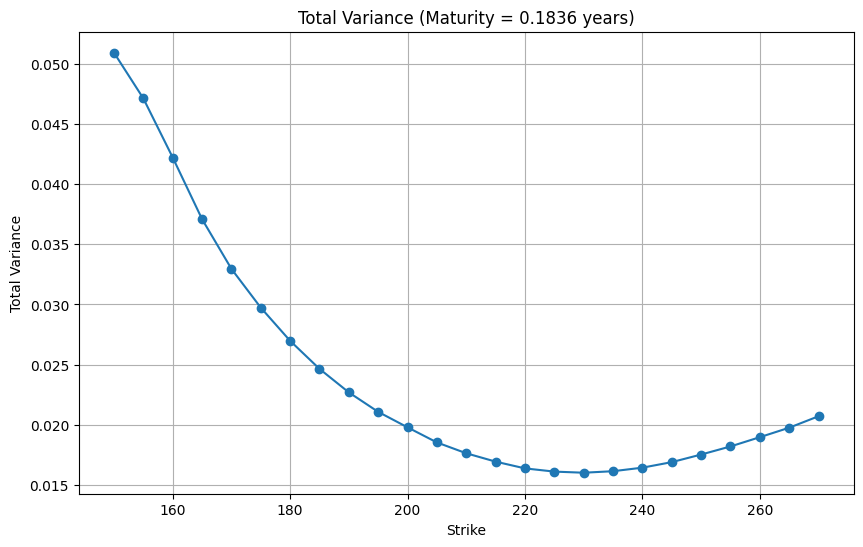

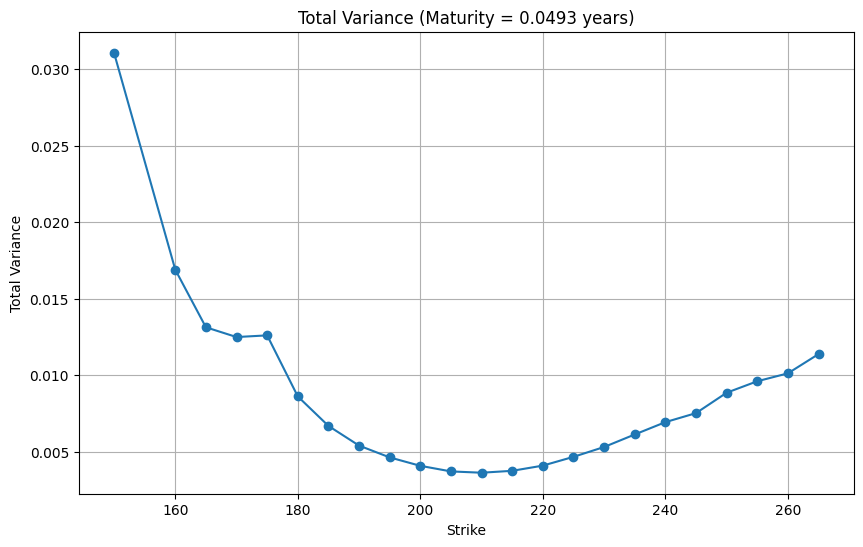

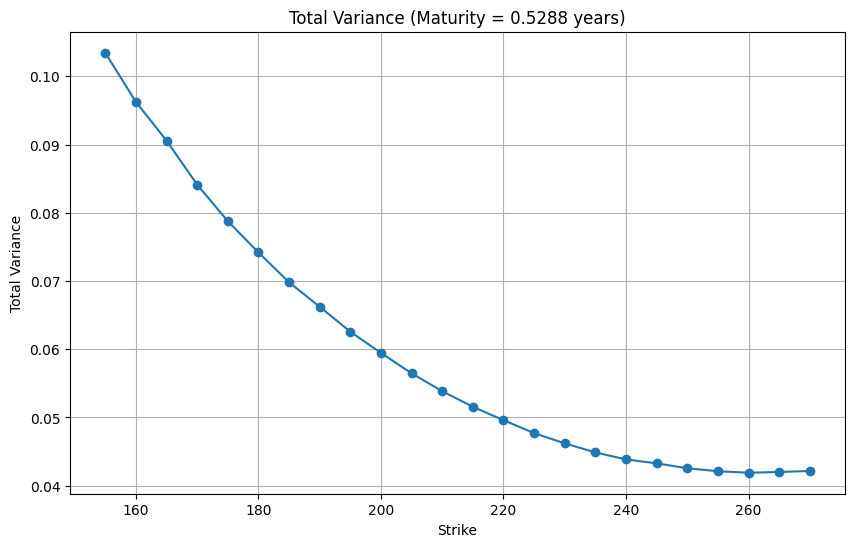

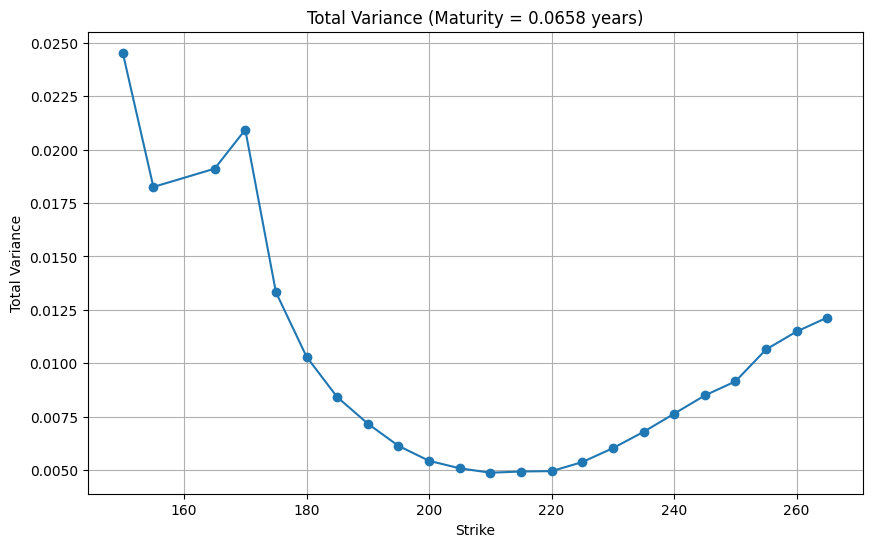

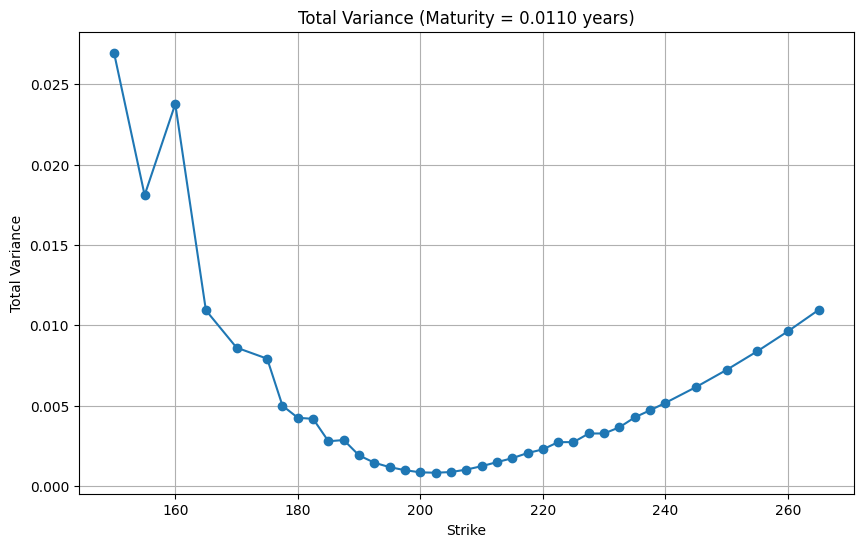

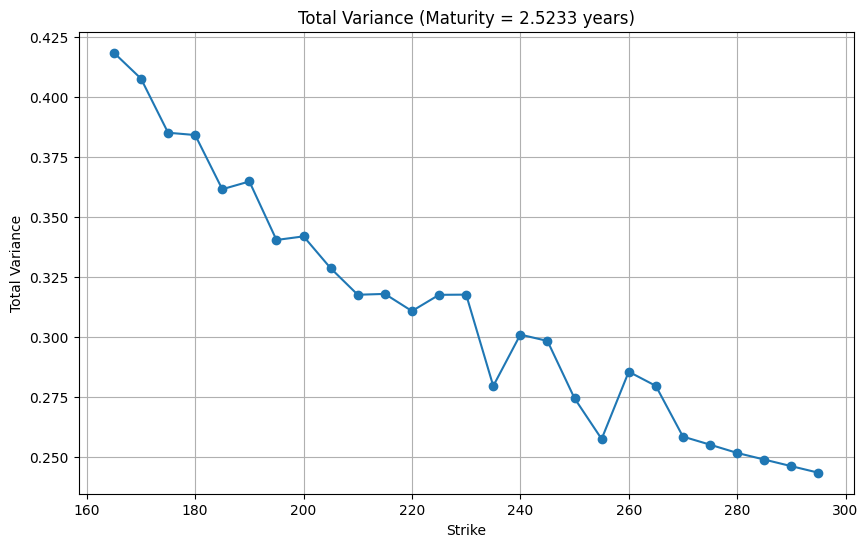

In [3]:
import matplotlib.pyplot as plt
import numpy as np

for target_maturity in set(calls["maturity"]):
    filtered_calls = calls[np.isclose(calls["maturity"], target_maturity, atol=1e-6)]

    plt.figure(figsize=(10, 6))
    plt.plot(filtered_calls["strike"], filtered_calls["totalVariance"], marker='o', linestyle='-')
    plt.title(f"Total Variance (Maturity = {target_maturity:.4f} years)")
    plt.xlabel("Strike")
    plt.ylabel("Total Variance")
    plt.grid(True)
    plt.show()

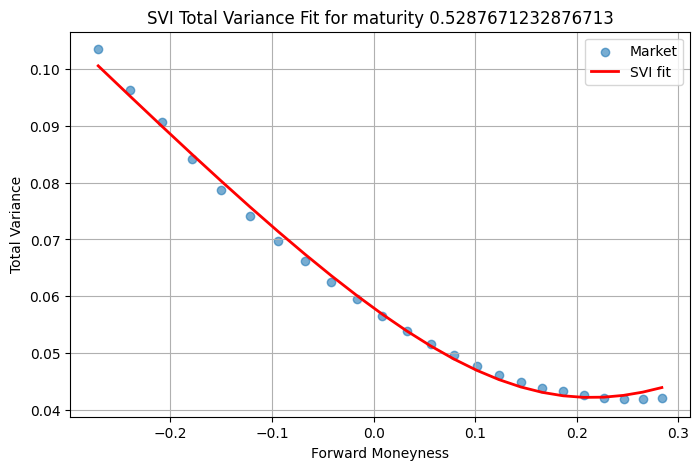

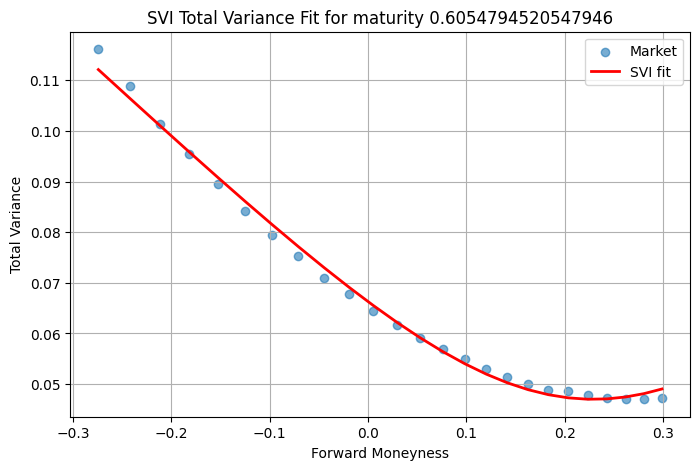

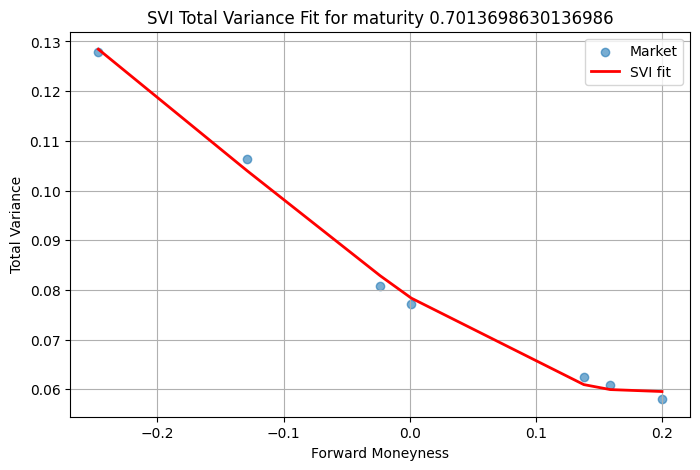

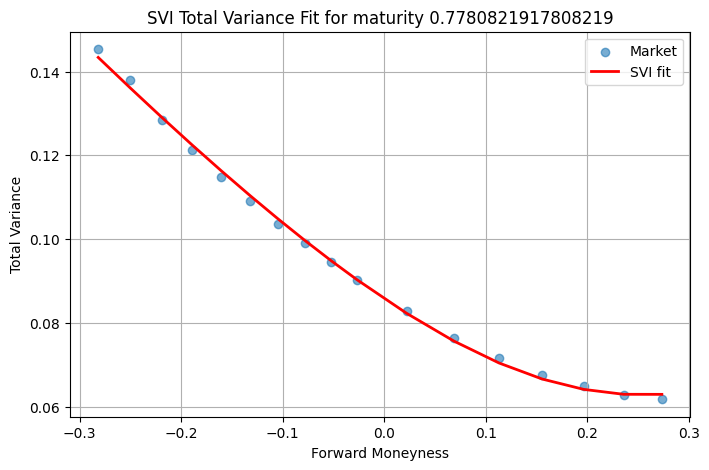

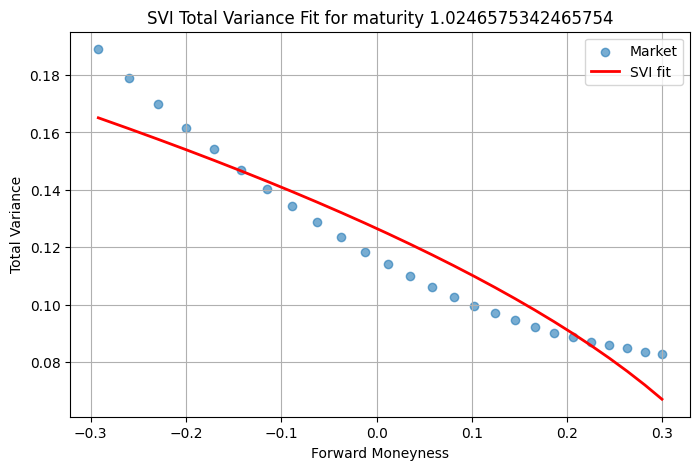

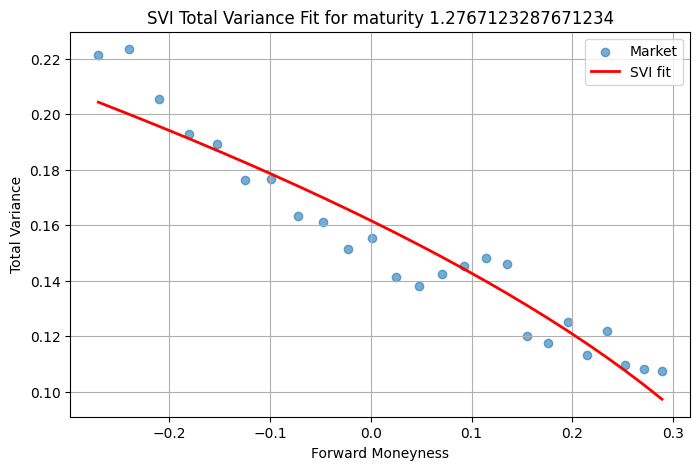

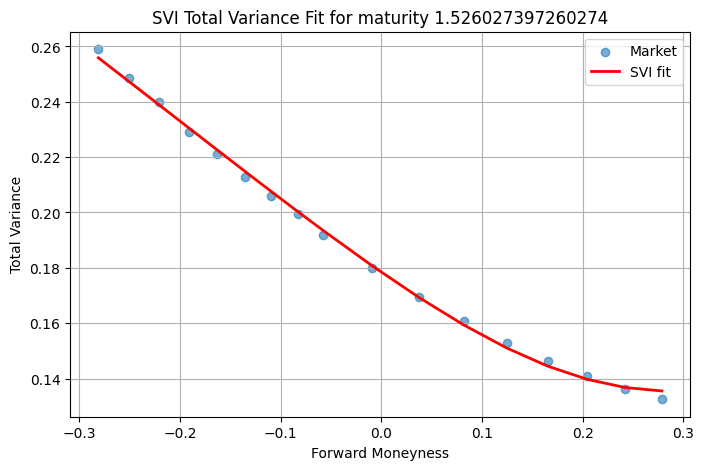

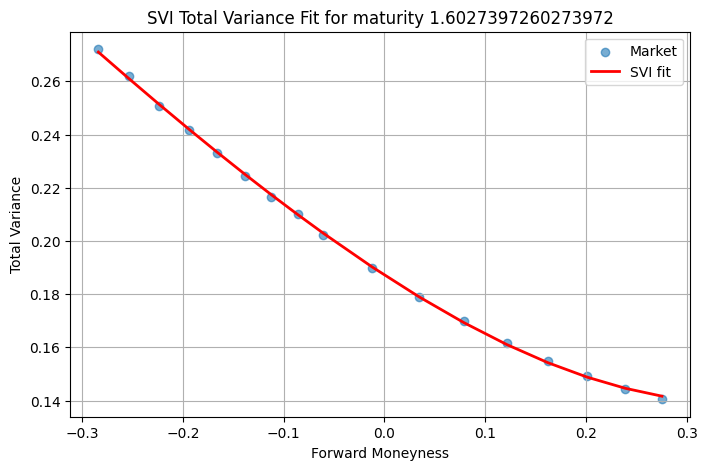

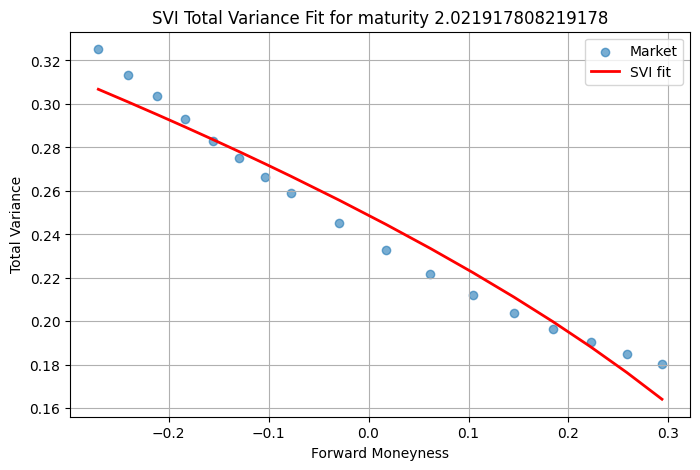

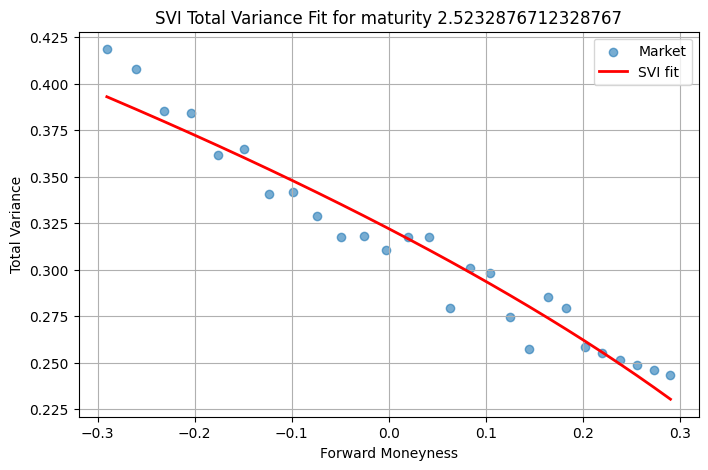

In [5]:
from svioptimizer import SVI
from enums import SVIParameterizationType

maturities = sorted(set(calls[calls["maturity"] >= 0.5]["maturity"]))

for target_maturity in maturities:

    filtered_calls = calls[np.isclose(calls["maturity"], target_maturity, atol=1e-6)]

    svimodel = SVI(SVIParameterizationType.RAW, [0.01, 0.01, 0.01, 0.01, 0.01])

    svimodel.optimize(filtered_calls["forwardMoneyness"].values, filtered_calls["totalVariance"].values)

    x = filtered_calls["forwardMoneyness"].values
    y = filtered_calls["totalVariance"].values
    y_fit = svimodel.evaluate(x)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Market", alpha=0.6)
    plt.plot(x, y_fit, color="red", label="SVI fit", linewidth=2)
    plt.xlabel("Forward Moneyness")
    plt.ylabel("Total Variance")
    plt.title(f"SVI Total Variance Fit for maturity {target_maturity}")
    plt.legend()
    plt.grid(True)
    plt.show()